In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score


import matplotlib.pyplot as plt
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn import linear_model
from sklearn import svm

In [2]:
file = pd.read_csv('../framinghan_function/framingham-score-risk.csv')
df   = pd.DataFrame(file)

In [3]:
df = df.drop(columns = ['ap_hi', 'ap_lo', 'cholesterol', 'cardio', 'fram_score', 'risk_group'])

In [4]:
X = df.drop(["risk"], axis=1)
y = df["risk"]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [5]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [6]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

print(y_pred)

# Calculate the absolute errors
errors = abs(y_pred - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

[0.04395333 0.07418879 0.01727371 ... 0.09171506 0.05004339 0.1335298 ]
Mean Absolute Error: 0.0232 degrees.


In [7]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4), '%.')

Accuracy: 69.362 %.


# Let's evaluate the best number of stimators.

In [8]:
# Instantiate model with 1000 decision trees

n_range = range(100)
accuracy_list = []

for n in n_range:
    rf = RandomForestRegressor(n_estimators = n+1, random_state = 42)

    # Train the model on training data
    rf.fit(X_train, y_train)

    # Use the forest's predict method on the test data
    y_pred = rf.predict(X_test)

    print(y_pred)

    # Calculate the absolute errors
    errors = abs(y_pred - y_test)

    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 4), 'degrees.')

    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)# Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    accuracy_list.append(accuracy)
    print('Accuracy:', round(accuracy, 4), '%.')



[0.03       0.07563218 0.01773333 ... 0.09307143 0.0486     0.14333333]
Mean Absolute Error: 0.0246 degrees.
Accuracy: 68.1243 %.
[0.04       0.07578069 0.01715935 ... 0.08996709 0.05101429 0.13666667]
Mean Absolute Error: 0.024 degrees.
Accuracy: 68.6846 %.
[0.04333333 0.07550571 0.01733242 ... 0.09074525 0.04945824 0.13777778]
Mean Absolute Error: 0.0237 degrees.
Accuracy: 68.9659 %.
[0.04166667 0.07547362 0.01706558 ... 0.09087945 0.05130664 0.13708333]
Mean Absolute Error: 0.0236 degrees.
Accuracy: 69.0287 %.
[0.04133333 0.07533635 0.01714697 ... 0.09148219 0.05104532 0.135     ]
Mean Absolute Error: 0.0235 degrees.
Accuracy: 69.0965 %.
[0.04166667 0.07525735 0.017155   ... 0.09200751 0.05121201 0.133125  ]
Mean Absolute Error: 0.0234 degrees.
Accuracy: 69.1888 %.
[0.04171429 0.07508545 0.0171774  ... 0.09162387 0.05099918 0.13446429]
Mean Absolute Error: 0.0233 degrees.
Accuracy: 69.2117 %.
[0.042125   0.07485518 0.0172021  ... 0.09141112 0.05083042 0.13694196]
Mean Absolute Error

[0.0438     0.07420479 0.01734831 ... 0.09159574 0.0500449  0.13355897]
Mean Absolute Error: 0.0232 degrees.
Accuracy: 69.3459 %.
[0.04383333 0.07426062 0.01734981 ... 0.0916156  0.05008857 0.13365656]
Mean Absolute Error: 0.0232 degrees.
Accuracy: 69.3472 %.
[0.04362687 0.07421989 0.01735738 ... 0.09163812 0.05005213 0.13392182]
Mean Absolute Error: 0.0232 degrees.
Accuracy: 69.3478 %.
[0.04372059 0.07420252 0.01734232 ... 0.09168819 0.05005136 0.13357003]
Mean Absolute Error: 0.0232 degrees.
Accuracy: 69.348 %.
[0.04376329 0.07418143 0.01733507 ... 0.09171246 0.0500722  0.13350621]
Mean Absolute Error: 0.0232 degrees.
Accuracy: 69.3469 %.
[0.04385238 0.07415003 0.01733504 ... 0.09173484 0.05007992 0.13317041]
Mean Absolute Error: 0.0232 degrees.
Accuracy: 69.3478 %.
[0.04393897 0.07415484 0.01734584 ... 0.09170802 0.05006119 0.13323139]
Mean Absolute Error: 0.0232 degrees.
Accuracy: 69.3483 %.
[0.04388426 0.07417154 0.01733851 ... 0.09166061 0.05004413 0.13325595]
Mean Absolute Error

Text(0, 0.5, 'testing accuracy')

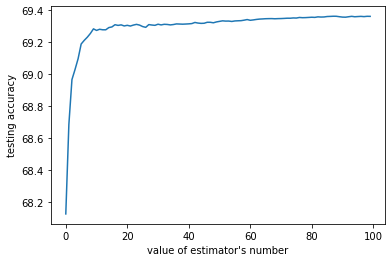

In [9]:
n_range = list(range(100))

plt.plot(n_range, accuracy_list)
plt.xlabel("value of estimator's number")
plt.ylabel('testing accuracy')


In [13]:
errors.describe()

count    1.400000e+04
mean     2.317336e-02
std      2.732968e-02
min      6.938894e-18
25%      6.595107e-03
50%      1.469394e-02
75%      2.845505e-02
max      2.877884e-01
Name: risk, dtype: float64